Prove that the mean squared displacement of a random walk is proportional to the number of steps taken (2 dimensions).

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(N):
    # N is the number of steps
    x = 0
    y = 0
    for i in range(N):
        x += np.random.choice([-1, 1])
        y += np.random.choice([-1, 1])
    return x**2 + y**2

mean_squared_list = []
mean_squared_errors = []
N_steps = np.arange(10, 200, 10)
for i in N_steps:
    list = []
    for j in range(1000):
        list.append(random_walk(i))
    mean_squared_list.append(np.mean(list))
    mean_squared_errors.append(np.std(list)/np.sqrt(len(list)))

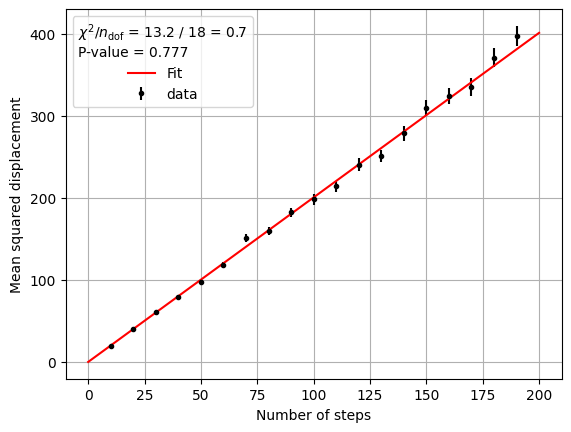

In [9]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2

def linear_model(N, a):
    return a*N

ls = LeastSquares(N_steps, mean_squared_list, mean_squared_errors, linear_model)
minuit = Minuit(ls, a=1)
minuit.migrad()
minuit.hesse()

xaxis = np.linspace(0, np.max(N_steps) + 10, 10000)
plt.errorbar(N_steps, mean_squared_list, fmt='.', yerr=mean_squared_errors, ecolor='black', label="data", color='black')
plt.plot(xaxis, linear_model(xaxis, minuit.values['a']), label='Fit', color='red')
p_value = (1. - chi2.cdf (minuit.fval, df = minuit.ndof))
chi_reduced = minuit.fval/minuit.ndof
fit_info = [f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {minuit.ndof:.0f} = {chi_reduced:.1f}",]
fit_info.append(f"P-value = {p_value:.3f}")
plt.xlabel('Number of steps')
plt.ylabel('Mean squared displacement')
plt.legend(title="\n".join(fit_info), frameon=True)
plt.grid(True)